# New York Stock Exhange Predictions RNN-LSTM

## Aim of the project:

#### Train a model to get predictions for "New York Stock Exchange".
#### The dataset is from the year of 2016.

## 1. Dependencies

In [6]:
import numpy as np 
import pandas as pd 
import os #libray used to work on operating system files and processes
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## 2. Description of the datasets


#### 1. prices.csv: 

raw, as-is daily prices. Most of data spans from 2010 to the end 2016. The time horizon is different (shorter) for companies that were new on stock market date range. There have been approx. 140 stock splits in that time. This dataset does not account for that.

#### 2. prices-split-adjusted.csv: 

same as prices but with added adjustments for splits.

#### 3. securities.csv: 

general description of each company with division on sectors.

#### 4. fundamentals.csv: 

metrics extracted from annual SEC 10K fillings (2012-2016).They suffice in order to derive most of popular fundamental indicators.

## 3. Exploration and cleaning of the datasets.

#### 3.1. Exploration of the dataset containing the prices

In [9]:
df= pd.read_csv('prices.csv', header=0)
df.head()
# the data set of the prices and volume for the stocks identified with respective symbols

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [10]:
# size of the dataset
df.shape

(851264, 7)

In [11]:
df.symbol.unique() # [0:20]

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [13]:
len(df.symbol.unique()) # 501 different stocks

501

In [14]:
# statistical description of the dataset
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [16]:
# no nan values
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [18]:
df.date.unique()
# date range from 05 January to 30 December of the year 2016

array(['2016-01-05 00:00:00', '2016-01-06 00:00:00',
       '2016-01-07 00:00:00', ..., '2016-12-28', '2016-12-29',
       '2016-12-30'], dtype=object)

### 3.2. Exploration of the dataset with the securities

In [21]:
comp_info = pd.read_csv("securities.csv", header=0)
comp_info.head()
# ticker symbol is a primary key variable shared in the file of prices

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",31-03-1964,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31-12-2012,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06-07-2011,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",31-08-2015,718877


In [23]:
comp_info["Ticker symbol"].nunique()
# more 4 symbols or companies than the ones in the file of prices

505

In [25]:
# searching for a specific company: Facebook
comp_info.loc[comp_info.Security.str.startswith('Face'), :]

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
181,FB,Facebook,reports,Information Technology,Internet Software & Services,"Menlo Park, California",23-12-2013,1326801


In [27]:
# locate specific companies for purpose of visualization
comp_plot = comp_info.loc[(comp_info["Security"] == 'Yahoo Inc.') | (comp_info["Security"] == 'Xerox Corp.') | (comp_info["Security"] == 'Adobe Systems Inc')
              | (comp_info["Security"] == 'Microsoft Corp.') | (comp_info["Security"] == 'Adobe Systems Inc') 
              | (comp_info["Security"] == 'Facebook') | (comp_info["Security"] == 'Goldman Sachs Group') , ["Ticker symbol"] ]["Ticker symbol"] 
print(comp_plot)

6      ADBE
181      FB
212      GS
306    MSFT
496     XRX
500    YHOO
Name: Ticker symbol, dtype: object


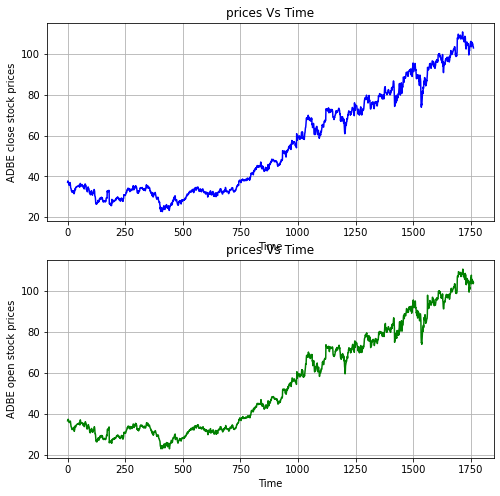

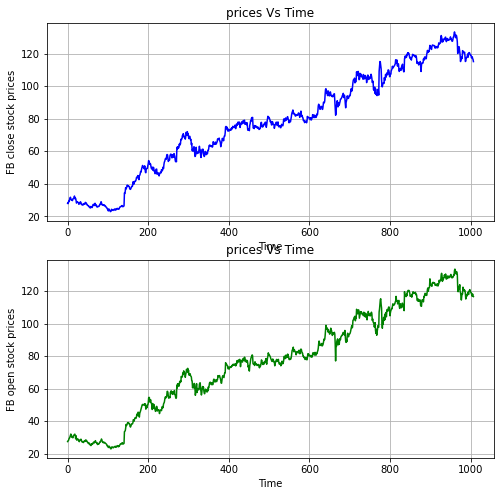

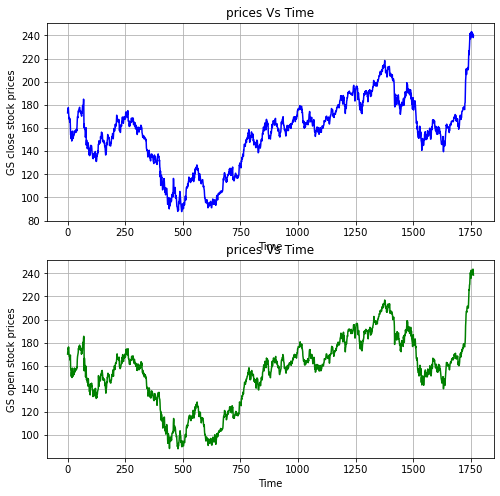

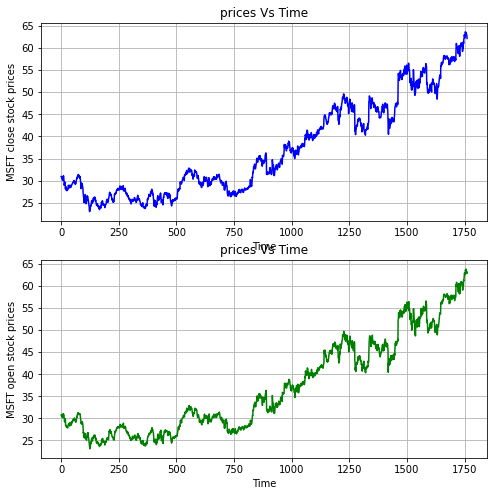

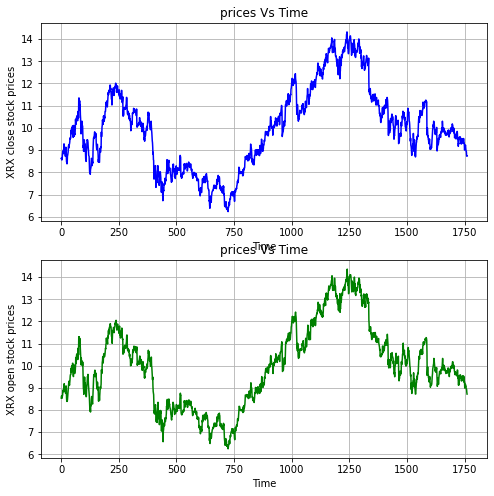

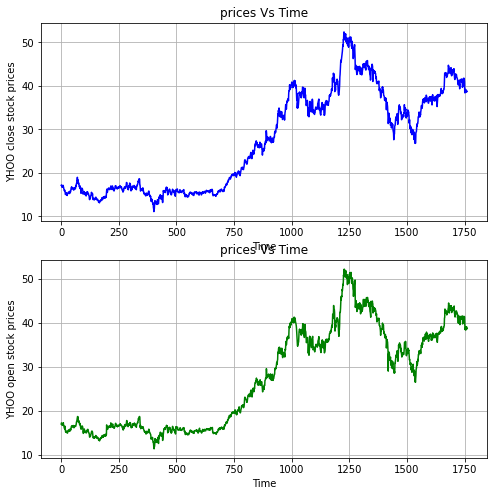

In [28]:
# construction of the function to plot the open/close price for the 6 companies stored ahead in 
# the series comp_info
def plotter(code):
    # creating variable for whole notebook
    global closing_stock ,opening_stock
    #creating plot of all 6 company for opening and closing
    f, axs = plt.subplots(2,2,figsize=(8,8))
    # total 12 graphs
    # creating plot opening prize of particular company
    plt.subplot(212)
    #taking name of the company as code
    company = df[df['symbol']==code]
    #taking the values of one company and taking its open column values
    company = company.open.values.astype('float32')
    #reshaping the open column value in 1D and calling it opening_stock
    company = company.reshape(-1, 1)
    # putting the value of company in opening_stock 
    opening_stock = company
    # plotting the data with green graph between "Time" and "prices vs time"
    
    plt.grid(True)# enalbling the grid in graph
    plt.xlabel('Time') # setting X axis as time
    plt.ylabel(code + " open stock prices") # setting Y axis as company name + open stock prices
    plt.title('prices Vs Time') # setting title
    plt.plot(company , 'g') # calling the graph with green graph line
    
    # creating plot closing prize of particular company
    plt.subplot(211)
    #taking name of the company as code
    company_close = df[df['symbol']==code]
    #taking the values of one company and taking its close column values
    company_close = company_close.close.values.astype('float32')
    #reshaping the open column value in 1D and calling it closing_stock
    company_close = company_close.reshape(-1, 1)
    # putting company_close value in closing_stock 
    closing_stock = company_close
    # plotting the data graph between "Time" and "prices vs time"
    
    plt.xlabel('Time') # setting x axis as time
    plt.ylabel(code + " close stock prices")# setting y axis as company name + open stock prices
    plt.title('prices Vs Time') # setting title as price vs time
    plt.grid(True) # enabling the grid in graph
    plt.plot(company_close , 'b') #creating the data graph in blue graph line
    plt.show() # calling the graph

# calling the graphs through the function    
for i in comp_plot:
    plotter(i)

### Conclusions.

#### Adobe report:
** the close and open prices started around 38 points and showed an increasing growth through time. The open and close graph closes at a very high position (around 105) when compared to the starting point of the plot.**
 
## Facebook report:
** the open and close prices started around 30 points. We register a downfall around the time stick numbered 150. Afterwards it shows a massive uprise and it ends at 120 points for both open and close prices.**

## Goldman Sachs report:
** we see that Goldman Sachs had many up and downs almost the whole year. It registered a higher value than other companies around 175 points and faced a major downfall reaching at last a  higher value of 240 points.**

## Microsoft report:
** the open and close prices for Microsoft stocks started with a value of 30 points. From there both prices show a upward trend that achieves 65 points. It was a great investment choice **

## Xerox report:
** both quotations (open and close) registered an initial low value of 9 points and from there it struggled to progress. There was a major fall after some time and at the end of the time period the stock prices are still nearly same. **   

## Yahoo report:
** Yahoo open and close prices remained the same for some time. After that initial intertial period they show effective progress achieving in the end of the time period a value around 40 points.**

## 4. Construction of the model.

### 4.1 Feature engineering.

In [29]:
#taking the values of closing_stock in a single list
closing_stock[:,0]

array([17.1 , 17.23, 17.17, ..., 38.73, 38.64, 38.67], dtype=float32)

In [30]:
#taking the values of closing_stock in a single list called stocks
stocks = closing_stock[: , 0]
print(stocks)
#reshaping the stocks in 1D array form
stocks = stocks.reshape(len(stocks) , 1)

[17.1  17.23 17.17 ... 38.73 38.64 38.67]


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) #scaling features between 0 and 1
stocks = scaler.fit_transform(stocks) # it provides scaled and dimension reduced output

In [32]:
train = int(len(stocks) * 0.80) #creating sizes of train and taking 80% percentage of the part
test = len(stocks) - train #creating sizes of test as total minus train

In [35]:
#sizes of train and test
print(train, test)

1409 353


In [36]:
#dividing the values of stocks data to train from 0 to 1409 i.e 80% data
train = stocks[0:train]
print(train)

[[0.14559111]
 [0.14874032]
 [0.14728683]
 ...
 [0.63372093]
 [0.6145833 ]
 [0.6196705 ]]


In [37]:
#the 20% rest of the data to test the model
test = stocks[len(train) : ]

In [38]:
#reshaping train data in 1D array form
train = train.reshape(len(train) , 1)
#reshaping test data in 1D array form
test = test.reshape(len(test) , 1)

In [39]:
#new train and test array shape
print(train.shape , test.shape)

(1409, 1) (353, 1)


### 4.2. Choice of the model: Gated recurrent unit (GRU)

The GRU is like a long short-term memory (LSTM) with a forget gate but has fewer parameters than LSTM, as it lacks an output gate.

In [40]:
#creating a function to feed trainX, testX set and target(trainY, testY)
def process_data(data , n_features):
    dataX, dataY = [], [] # creating datasets for explanatory X and target Y variables
    for i in range(len(data)-n_features-1):
        # taking i ranging from total size- 3 
        a = data[i:(i+n_features), 0]
        # a is the value of data from i to i+ n_features in 1D 
        dataX.append(a) #putting a in dataX
        #here dataY takes the value of data of i + n_features
        dataY.append(data[i + n_features, 0])
        # putting i+ n_features in  dataY
    return np.array(dataX), np.array(dataY)
# returning dataX and dataY in the form of arrays

# therefore the stucture of the trainX and trainY is somehow like this:
# trainX=[[i1 , i2,...., i n_features ]] and trainY=[i + n_features]  
# trainY will show the future value of trainX values

### In what follows:

Here we take 2 past values to predict a single future value. TrainY is built in such a way that it will show the future time value of the given data(trainX).
When we train the model it will learn how to predict the value of one time period ahead.**

In [41]:
n_features = 2

trainX, trainY = process_data(train, n_features)
# testY, trainY has one value that will be future value from two steps ahead of corresponding(testY,trainX) value
testX, testY = process_data(test, n_features)

In [42]:
# printing the structure of train X,Y and test X,Y
print(trainX.shape , trainY.shape , testX.shape , testY.shape)

(1406, 2) (1406,) (350, 2) (350,)


In [44]:
### Comment: we have to reshape the data to be ready to be LSTM input variables 
# as (sample , timestamp , features per sample).** Timestamp=1

In [45]:
# reshaping trainX and testX to use in deeplearning model
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])

### 4.2. Building the model

In [48]:
import math # helps us do mathematical operations
from keras.models import Sequential # for setting layers one by one neural layer in model 
from keras.layers import Dense , BatchNormalization , Dropout , Activation # types of layers
from keras.layers import LSTM , GRU # types of RNN
from sklearn.preprocessing import MinMaxScaler #It transforms the data in between a given range
from sklearn.metrics import mean_squared_error # In this method the errors in column is the mean squared error.
from keras.optimizers import Adam , SGD , RMSprop # they are the algos that found the output for model

In [50]:
## Checkpointing the model

filepath="stock_weights1.hdf5"
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
# the model reduce the learning rate where the value are not repeated or too close to reduce overfitting
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_delta=0.0001, patience=1, verbose=1)
# for saving the best result value from the epoochs as checkpoints
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')

### Comments:

#### Callbacks:
 A callback is a set of functions that are applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training. You can pass a list of callbacks (as the keyword argument callbacks) to the .fit() method of the Sequential or Model classes. The relevant methods of the callbacks will then be called at each stage of the training.

#### ReduceLROnPlateau:
Reduce learning rate when a metric has stopped improving. Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.

#### ModelCheckpoint:
Save the model after every epoch. The filepath can contain named formatting options which will be filled with the values of epoch and keys in logs (passed in on_epoch_end).

#### Activation functions:

The output of the first layer is the result of a densely connected layer with a tanh function. Then these outputs will each be transformed by a relu function.

#### Learning rate:

The learning rate has been tuned for several times as it was the batch_size and the neurons in the respective layers.**

#### Instancing the model:

In [51]:
# creating model for training data using sequential to give series wise output between layers
model = Sequential()
# GRU or Gated Recurrent Unit used for matrix manipulation within Recurrent layer
model.add(GRU(256 , input_shape = (1 , n_features) , return_sequences=True))
#dropout is used to remove overfitting data on each layer of neural network
model.add(Dropout(0.4))
#Long Short Term Memory is a type of RNN specially used for time series problems
model.add(LSTM(256))
#dropout is used to remove overfitting data on each layer of neural network
model.add(Dropout(0.4))
#Dense layer are fully connected neural networks 
model.add(Dense(64 ,  activation = 'relu'))
model.add(Dense(1))
#for getting the details of our models
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1, 256)            199680    
_________________________________________________________________
dropout (Dropout)            (None, 1, 256)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 256)               525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                16448     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 741,505
Trainable params: 741,505
Non-trainable params: 0
__________________________________________________

### Comments:

#### Dense layer: 
it implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer and bias is a bias vector created by the layer (only applicable if use_bias is True). If the input to the layer has a rank greater than 2, then it is flattened prior to the initial dot product with kernel.


#### Dropout:
it is a technique used to prevent a model from overfitting. Dropout works by randomly setting the outgoing edges of hidden units (neurons that make up hidden layers) to 0 at each update of the training phase.


### Recap of the ML pipeline:

1. We ranged the data for output with minmaxscaler

2. Then we scaled the data with fit_transform

3. We divided the price.csv dataset in train and test respectively (80% , 20%)

4. We scaled and reshape the train data for building the prediction model.

5. We created a sequential model with RNN that gives the output as of the stock exchange price



### 4.3. Compiling the model

In [54]:
# selecting the loss measurement metrics and the optimizer solver Adam for our model
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005) , metrics = ['mean_squared_error'])

In [55]:
# fitting the data i.e training the trainX to find the predicted trainY
#One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE

#The batch size is a hyperparameter that defines the number of samples to work through 
#before updating the internal model parameters.

#Think of a batch as a for-loop iterating over one or more samples and making predictions.
#At the end of the batch, the predictions are compared to the expected output variables and 
#an error is calculated. From this error, the update algorithm is used to improve the model, 
#e.g. move down along the error gradient.

# validation_data is the validation or data used for testing

history = model.fit(trainX, trainY, epochs=100 , batch_size = 128 , 
          callbacks = [checkpoint , lr_reduce] , validation_data = (testX,testY))    
#callbacks are proper

Epoch 1/100
11/11 [==============================] - ETA: 0s - loss: 0.1586 - mean_squared_error: 0.1586
Epoch 00001: val_loss improved from -inf to 0.22388, saving model to stock_weights1.hdf5
11/11 [==============================] - 1s 89ms/step - loss: 0.1586 - mean_squared_error: 0.1586 - val_loss: 0.2239 - val_mean_squared_error: 0.2239
Epoch 2/100
 9/11 [=======================>......] - ETA: 0s - loss: 0.0734 - mean_squared_error: 0.0734
Epoch 00002: val_loss did not improve from 0.22388
11/11 [==============================] - 0s 18ms/step - loss: 0.0651 - mean_squared_error: 0.0651 - val_loss: 0.0211 - val_mean_squared_error: 0.0211
Epoch 3/100
11/11 [==============================] - ETA: 0s - loss: 0.0212 - mean_squared_error: 0.0212
Epoch 00003: val_loss did not improve from 0.22388
11/11 [==============================] - 0s 21ms/step - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 4/100
11/11 [=========================

### 5.3 Visualizations

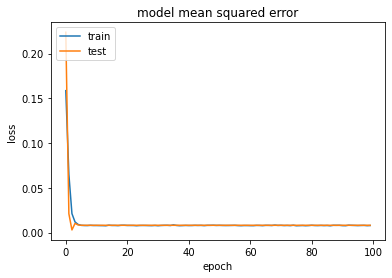

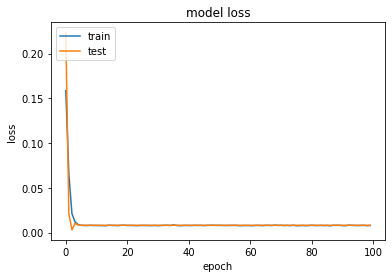

In [57]:
import matplotlib.pyplot as plt
plt.plot(history.history['mean_squared_error']) #from fitting 
plt.plot(history.history['val_mean_squared_error'])# val_mean_squared_error is property from callbacks
plt.title('model mean squared error') # setting the title of the graph
plt.ylabel('loss') # label of X axis
plt.xlabel('epoch')# label of y axis
plt.legend(['train', 'test'], loc='upper left') # key of the graph to tell difference between train and test graph
plt.show() # it calls the graph with labels, title, lines
# summarize history for loss

plt.plot(history.history['loss']) # loss is the value of cost function for your traing data
plt.plot(history.history['val_loss'])# val_loss is the value of cost function for your cross-validation data 
plt.title('model loss')#  setting the title of the graph
plt.ylabel('loss') # label of X axis
plt.xlabel('epoch') # label of Y axis
plt.legend(['train', 'test'], loc='upper left')  # key of the graph to tell difference between train and test graph
plt.show() # it call the graph with labels, titles, lines

#### Comments:
from the first epoch on we see the value of the train reaching a stable point around 0.025. For the test dataset the loss function reached a value below to 0.008 which shows how efficient the model is working.
The mean square error on the validation set is 0.000328 which is very low and good as well.

## 5. Comments and conclusions.

In [59]:
def model_score(model, X_train, y_train, X_test, y_test):
    # model. evaluate gives us the overall accuracy and loss
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    #here for trainX and trainY we print mean square error and root mean square error
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
    # model. evaluate gives us the overall accuracy and loss
    testScore = model.evaluate(X_test, y_test, verbose=0)
    #for testX and testY we print the mean square error and root mean square error
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    # it returns the loss of train and test 
    return trainScore[0], testScore[0]

# will return the value of overall mean squared error
model_score(model, trainX, trainY , testX, testY)

Train Score: 0.00694 MSE (0.08 RMSE)
Test Score: 0.00815 MSE (0.09 RMSE)


(0.006938501726835966, 0.008150769397616386)

### 5.1 Predictions

In [60]:
#predicting the value for testX
pred = model.predict(testX)
#converting pred list in 1D array so that it will be efficient in ploting
pred = scaler.inverse_transform(pred)
# prediction here will be the stock market price of further ahead of given company details
pred[:10]
# taking pred from 1 to 10

array([[33.049297],
       [32.096264],
       [31.99031 ],
       [32.64959 ],
       [32.721745],
       [32.528946],
       [32.201973],
       [31.642023],
       [30.831095],
       [29.84264 ]], dtype=float32)

In [61]:
# reshaping testY in single array
testY = testY.reshape(testY.shape[0] , 1)
#converting reshaped list in 1D array so that it will be efficient in ploting
testY = scaler.inverse_transform(testY)
# taking testY from 1 to 10
testY[:10]

array([[34.49    ],
       [35.93    ],
       [36.24    ],
       [36.1     ],
       [35.69    ],
       [35.19    ],
       [34.1     ],
       [32.93    ],
       [31.31    ],
       [31.739998]], dtype=float32)

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


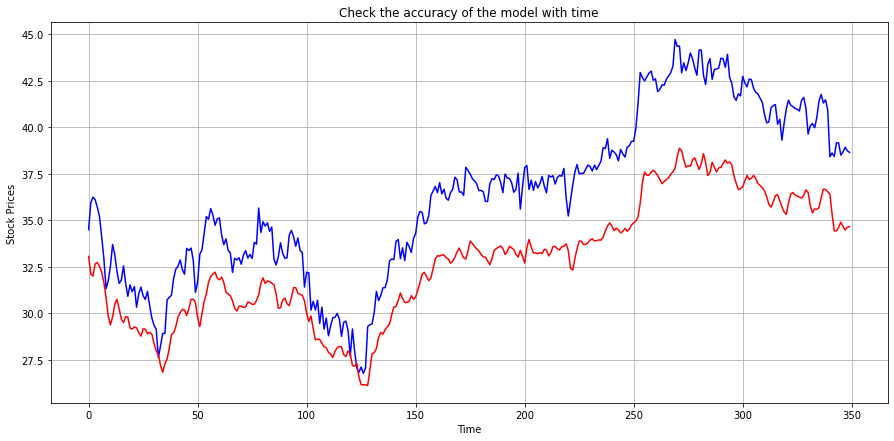

In [62]:
# ploting the graph of stock prices with time
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
# testY is the blue line grap
plt.plot(testY , 'b')
# pred is the red line grap
plt.plot(pred , 'r')
# setting x asix as time
plt.xlabel('Time')
# setting y asux as stock prices
plt.ylabel('Stock Prices')
# setting title 
plt.title('Check the accuracy of the model with time')
# enabling grids in graph 
plt.grid(True)
# it call the graph with labels, titles, lines
plt.show()

### 5.2. Conclusions:

The predictions and the real values follow the same trends of growth or ungrowth genreally speaking and around certain periods of time (before time period 50 and around period 130) they almost coalesce.